In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from scavenger import criterion
np.random.seed(0) # Also sets seed for pandas

data_dir = "./output"
data_path = Path(data_dir) / "results.csv"

In [2]:
df = pd.read_csv(str(data_path))
df.sample(10)

,doc_id,DomainCriterion,QuestionAnswerStringsCriterion,FullyStructuredCriterion,ExamStringsCriterion,QuestionStringsCriterion,StringsMatchCriterion,preview
708,data_708,False,False,True,False,False,False,"{ ""randomStatetest100"" : { ""_info"" :..."
533,data_533,False,False,False,False,False,False,/** * Prefixer (tools/_prefixer.scss) *//* ---...
298,data_298,False,False,False,False,False,False,1. Introduction {#sec1-jintelligence-05-00001}...
356,data_356,False,False,False,False,False,False,"FREETOWN, Sierra Leone — Rebels entered Bangui..."
833,data_833,False,False,False,False,False,False,Case: 16-10806 Date Filed: 08...
553,data_553,False,True,False,False,False,False,Q:Keep element always centered with side text ...
27,data_27,False,False,False,False,False,False,Umeå School of BusinessThe Umeå School of Busi...
231,data_231,False,False,False,False,False,False,"Khorramabad, NainKhorramabad (, also Romanized..."
306,data_306,False,False,False,False,False,False,Primo annuncio sulla Parata di Roma del Primo ...
994,data_994,False,False,False,False,False,False,The Wiert Corner– A client got this with Delph...


,criteria,counts
0,QuestionStringsCriterion,183.0
1,QuestionAnswerStringsCriterion,135.0
2,ExamStringsCriterion,10.0
3,FullyStructuredCriterion,2.0
4,StringsMatchCriterion,2.0
5,DomainCriterion,0.0


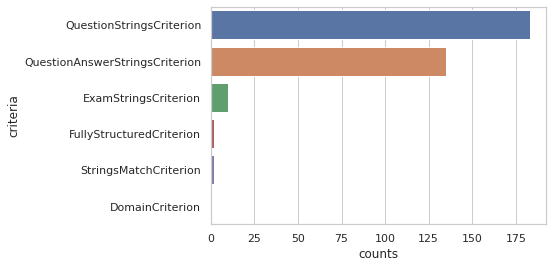

In [3]:
df_criteria = df.select_dtypes(include=bool)

criteria_counts = df_criteria.apply(pd.value_counts).loc[True]
criteria_counts.fillna(0, inplace=True)
criteria_counts.sort_values(ascending=False, inplace=True)
df_counts = pd.DataFrame({
    "criteria": criteria_counts.index,
    "counts": criteria_counts.values,
})
display(df_counts)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="counts", y="criteria", data=df_counts)